In [32]:
import numpy as np
import random
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
def read_file(directory):
    list_dir = os.listdir(directory)
    list_dir = sorted(list_dir)
    train_acc, train_loss, val_acc, val_loss = [],[],[],[]
    with open(directory+'/'+list_dir[0],'r') as f:
        for line in f:
            train_acc.append(float(line.rstrip('\n')))
    with open(directory+'/'+list_dir[1],'r') as f:
        for line in f:
            train_loss.append(float(line.rstrip('\n')))  
    with open(directory+'/'+list_dir[2],'r') as f:
        for line in f:
            val_acc.append(float(line.rstrip('\n')))  
    with open(directory+'/'+list_dir[3],'r') as f:
        for line in f:
            val_loss.append(float(line.rstrip('\n')))  

    return train_acc,train_loss,val_acc,val_loss

In [44]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    return m, m-h, m+h

def return_highest(input_list,interval):
    tmp_mean, tmp_diff = 0, 0
    for i in range(len(input_list)-interval):
        mean, high, low = mean_confidence_interval(input_list[i:interval+i])
        if mean > tmp_mean:
            tmp_mean = mean
            tmp_diff = high-mean

    return tmp_mean,-tmp_diff

In [35]:
_5w_1s_training_acc, _5w_1s_training_loss, _5w_1s_val_acc, _5w_1s_val_loss = read_file('mini_5way_1shot')
_5w_1s_training_acc_, _5w_1s_training_loss_, _5w_1s_val_acc_, _5w_1s_val_loss_ = read_file('../multi_fake/mini_5way_1shot')

_5w_5s_training_acc, _5w_5s_training_loss, _5w_5s_val_acc, _5w_5s_val_loss = read_file('mini_5way_5shot')
_5w_5s_training_acc_, _5w_5s_training_loss_, _5w_5s_val_acc_, _5w_5s_val_loss_ = read_file('../multi_fake/mini_5way_5shot')

_10w_1s_training_acc, _10w_1s_training_loss, _10w_1s_val_acc, _10w_1s_val_loss = read_file('mini_10way_1shot')
_10w_1s_training_acc_, _10w_1s_training_loss_, _10w_1s_val_acc_, _10w_1s_val_loss_ = read_file('../multi_fake/mini_10way_1shot')

_10w_5s_training_acc, _10w_5s_training_loss, _10w_5s_val_acc, _10w_5s_val_loss = read_file('mini_10way_5shot')
_10w_5s_training_acc_, _10w_5s_training_loss_, _10w_5s_val_acc_, _10w_5s_val_loss_ = read_file('../multi_fake/mini_10way_5shot')

_15w_1s_training_acc, _15w_1s_training_loss, _15w_1s_val_acc, _15w_1s_val_loss = read_file('mini_15way_1shot')
_15w_1s_training_acc_, _15w_1s_training_loss_, _15w_1s_val_acc_, _15w_1s_val_loss_ = read_file('../multi_fake/mini_15way_1shot')

_15w_5s_training_acc, _15w_5s_training_loss, _15w_5s_val_acc, _15w_5s_val_loss = read_file('mini_15way_5shot')
_15w_5s_training_acc_, _15w_5s_training_loss_, _15w_5s_val_acc_, _15w_5s_val_loss_ = read_file('../multi_fake/mini_15way_5shot')

_20w_1s_training_acc, _20w_1s_training_loss, _20w_1s_val_acc, _20w_1s_val_loss = read_file('mini_20way_1shot')
_20w_1s_training_acc_, _20w_1s_training_loss_, _20w_1s_val_acc_, _20w_1s_val_loss_ = read_file('../multi_fake/mini_20way_1shot')

_20w_5s_training_acc, _20w_5s_training_loss, _20w_5s_val_acc, _20w_5s_val_loss = read_file('mini_20way_5shot')
_20w_5s_training_acc_, _20w_5s_training_loss_, _20w_5s_val_acc_, _20w_5s_val_loss_ = read_file('../multi_fake/mini_20way_5shot')




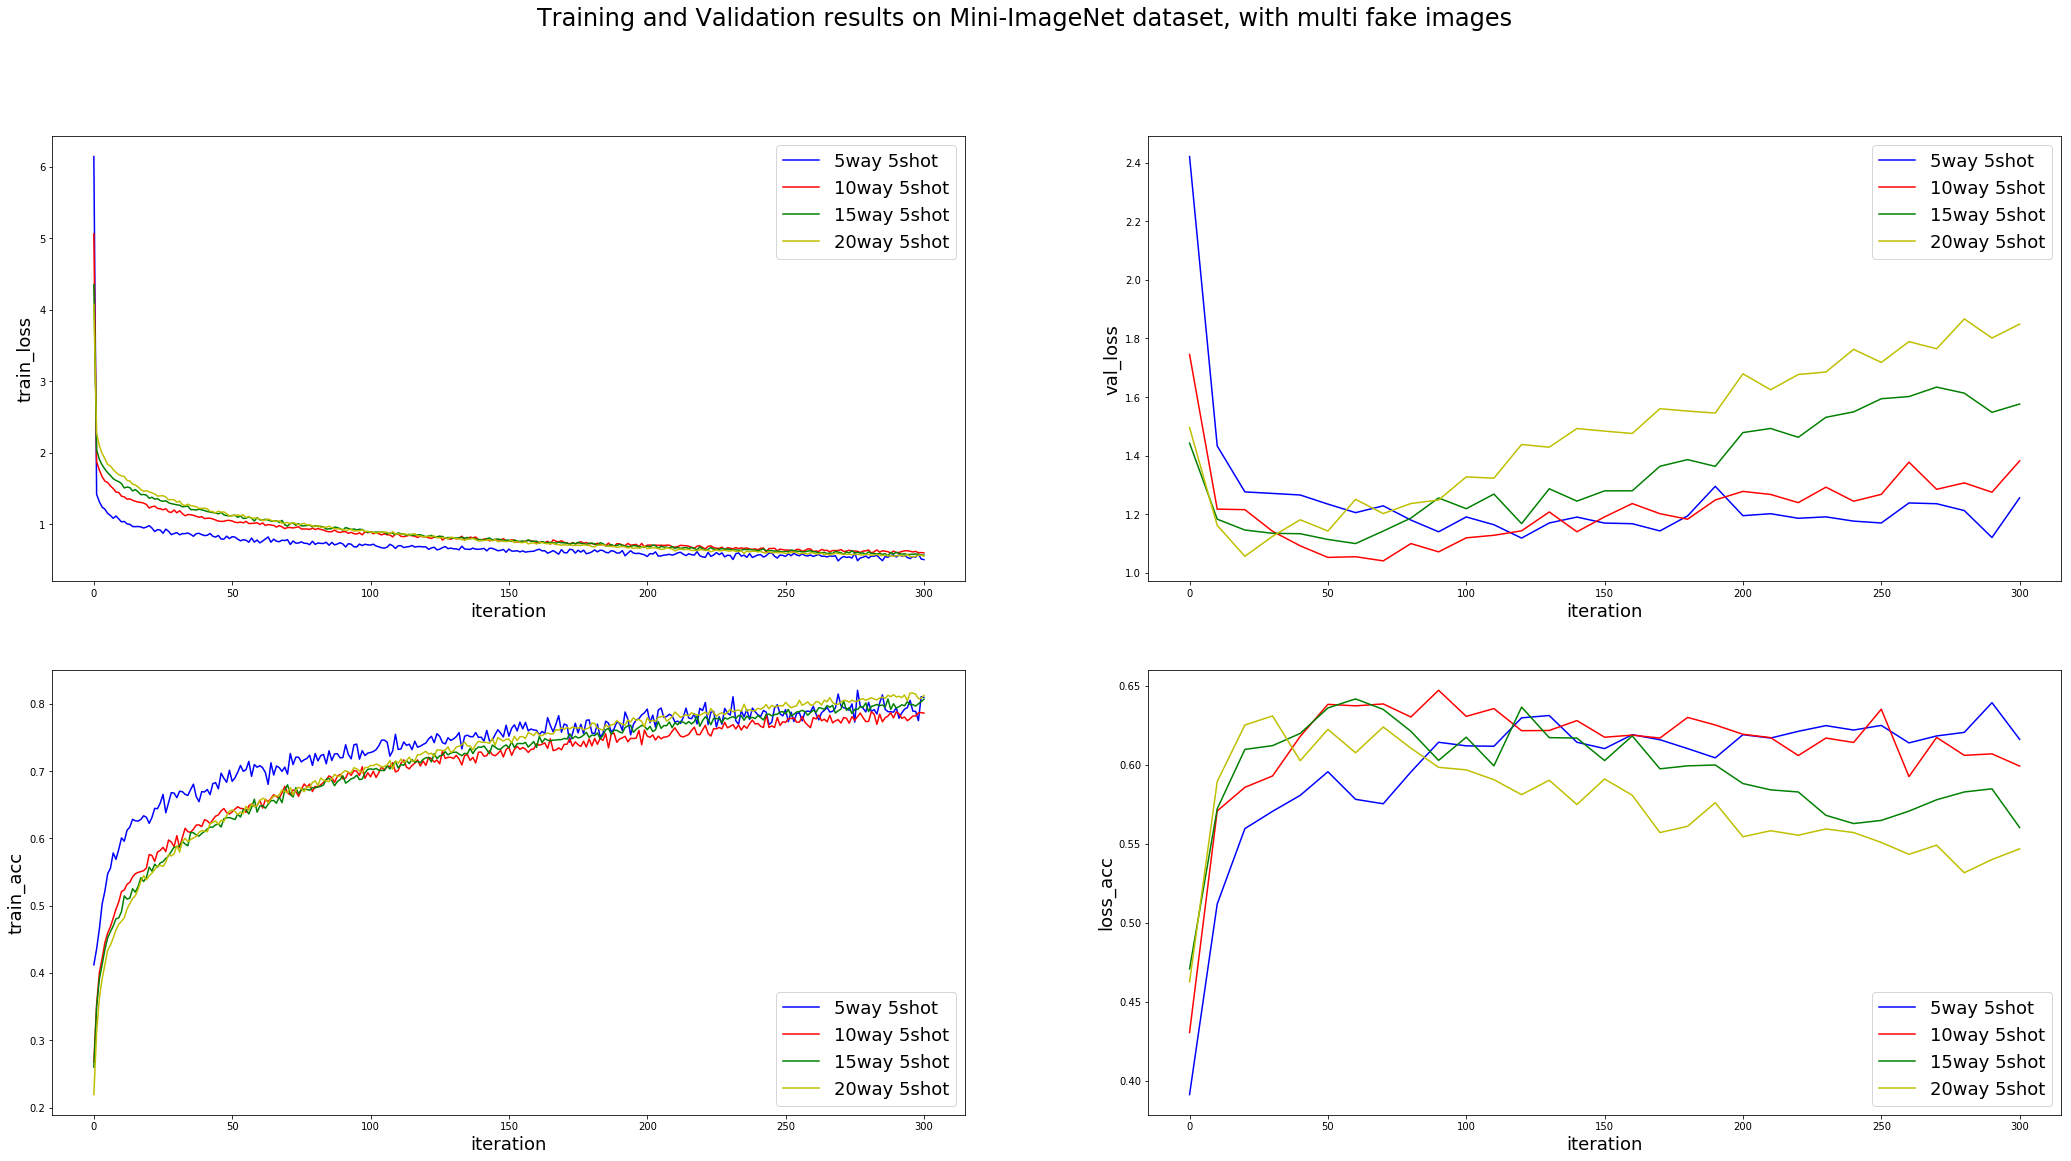

In [23]:
training = np.arange(0, 301, 1)
val = np.arange(0,301, 10)

fig = plt.figure(figsize=(36,18))
fig.suptitle('Training and Validation results on Mini-ImageNet dataset, with multi fake images', fontsize=24)

plt.subplot(2, 2, 1)
#plt.plot(training, _5w_1s_training_loss,'b')
plt.plot(training, _5w_5s_training_loss_[0:301],'b')
#plt.plot(training, _10w_1s_training_loss, 'r')
plt.plot(training, _10w_5s_training_loss_[0:301], 'r')
#plt.plot(training, _15w_1s_training_loss,'g')
plt.plot(training, _15w_5s_training_loss_[0:301],'g')
#plt.plot(training, _20w_1s_training_loss, 'y')
plt.plot(training, _20w_5s_training_loss_[0:301], 'y')

plt.xlabel('iteration', fontsize=18)
plt.ylabel('train_loss', fontsize=18)
plt.gca().legend(('5way 5shot','10way 5shot','15way 5shot','20way 5shot'), fontsize=18)

plt.subplot(2, 2, 2)
#plt.plot(val, _5w_1s_val_loss,'b')
plt.plot(val, _5w_5s_val_loss_[0:31],'b')
#plt.plot(val, _10w_1s_val_loss, 'r')
plt.plot(val, _10w_5s_val_loss_[0:31], 'r')
#plt.plot(val, _15w_1s_val_loss,'g')
plt.plot(val, _15w_5s_val_loss_[0:31],'g')
#plt.plot(val, _20w_1s_val_loss, 'y')
plt.plot(val, _20w_5s_val_loss_[0:31], 'y')

plt.xlabel('iteration', fontsize=18)
plt.ylabel('val_loss', fontsize=18)
plt.gca().legend(('5way 5shot','10way 5shot','15way 5shot','20way 5shot'), fontsize=18)

plt.subplot(2, 2, 3)
#plt.plot(training, _5w_1s_training_acc,'b')
plt.plot(training, _5w_5s_training_acc_[0:301],'b')
#plt.plot(training, _10w_1s_training_acc, 'r')
plt.plot(training, _10w_5s_training_acc_[0:301], 'r')
#plt.plot(training, _15w_1s_training_acc,'g')
plt.plot(training, _15w_5s_training_acc_[0:301],'g')
#plt.plot(training, _20w_1s_training_acc, 'y')
plt.plot(training, _20w_5s_training_acc_[0:301],'y')

plt.xlabel('iteration', fontsize=18)
plt.ylabel('train_acc', fontsize=18)
plt.gca().legend(('5way 5shot','10way 5shot','15way 5shot','20way 5shot'), fontsize=18)

plt.subplot(2, 2, 4)
#plt.plot(val, _5w_1s_val_acc,'b')
plt.plot(val, _5w_5s_val_acc_[0:31],'b')
#plt.plot(val, _10w_1s_val_acc, 'r')
plt.plot(val, _10w_5s_val_acc_[0:31], 'r')
#plt.plot(val, _15w_1s_val_acc,'g')
plt.plot(val, _15w_5s_val_acc_[0:31],'g')
#plt.plot(val, _20w_1s_val_acc, 'y')
plt.plot(val, _20w_5s_val_acc_[0:31], 'y')

plt.xlabel('iteration', fontsize=18)
plt.ylabel('val_acc', fontsize=18)
plt.gca().legend(('5way 5shot','10way 5shot','15way 5shot','20way 5shot'), fontsize=18)

#fig.savefig('../5shot_multi.jpg')
plt.show()

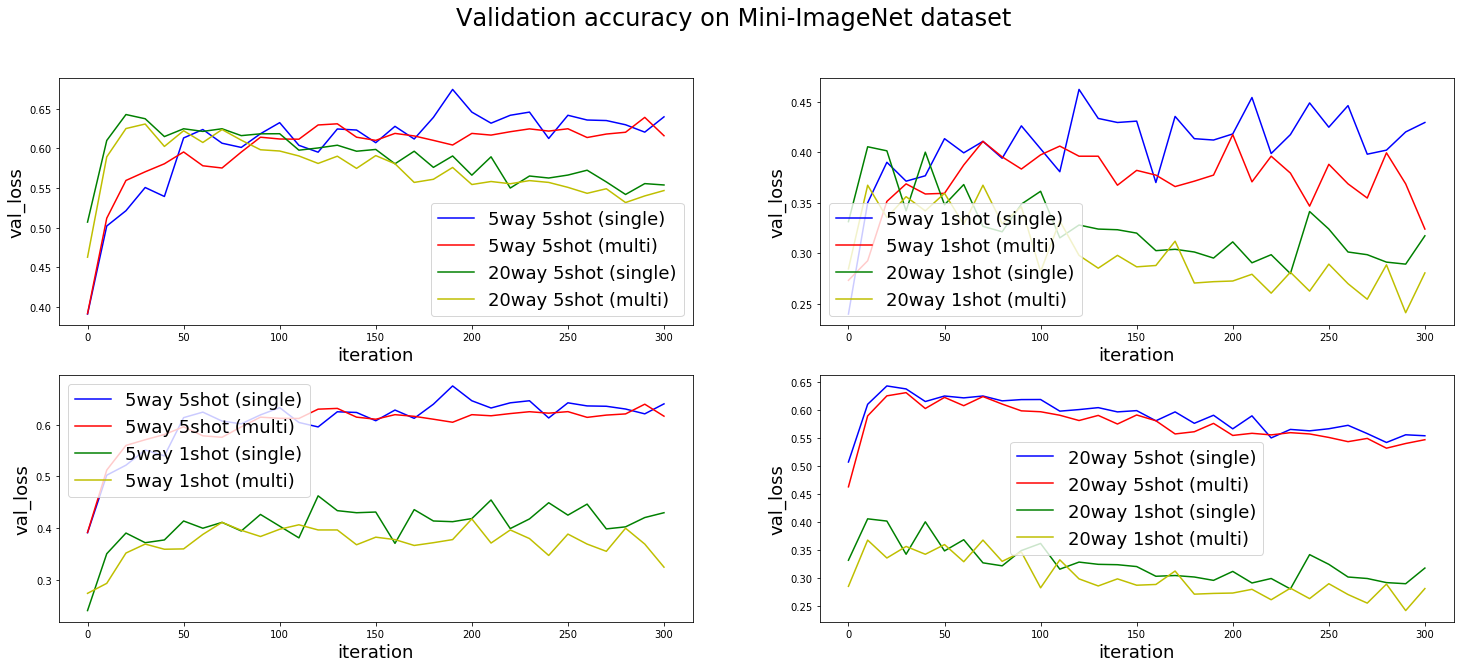

In [31]:
training = np.arange(0, 301, 1)
val = np.arange(0,301, 10)

fig = plt.figure(figsize=(25,10))
fig.suptitle('Validation accuracy on Mini-ImageNet dataset', fontsize=24)

plt.subplot(2, 2, 1)
plt.plot(val, _5w_5s_val_acc[0:31],'b')
plt.plot(val,_5w_5s_val_acc_[0:31],'r')
#plt.plot(val, _10w_5s_val_loss[0:31], 'r')
#plt.plot(val, _15w_5s_val_loss[0:31],'g')
plt.plot(val, _20w_5s_val_acc[0:31], 'g')
plt.plot(val, _20w_5s_val_acc_[0:31], 'y')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('val_loss', fontsize=18)
plt.gca().legend(('5way 5shot (single)','5way 5shot (multi)','20way 5shot (single)','20way 5shot (multi)'), fontsize=18)

plt.subplot(2, 2, 2)
plt.plot(val, _5w_1s_val_acc[0:31],'b')
plt.plot(val,_5w_1s_val_acc_[0:31],'r')
#plt.plot(val, _10w_5s_val_loss[0:31], 'r')
#plt.plot(val, _15w_5s_val_loss[0:31],'g')
plt.plot(val, _20w_1s_val_acc[0:31], 'g')
plt.plot(val, _20w_1s_val_acc_[0:31], 'y')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('val_loss', fontsize=18)
plt.gca().legend(('5way 1shot (single)','5way 1shot (multi)','20way 1shot (single)','20way 1shot (multi)'), fontsize=18)

plt.subplot(2, 2, 3)
plt.plot(val, _5w_5s_val_acc[0:31],'b')
plt.plot(val,_5w_5s_val_acc_[0:31],'r')
#plt.plot(val, _10w_5s_val_loss[0:31], 'r')
#plt.plot(val, _15w_5s_val_loss[0:31],'g')
plt.plot(val, _5w_1s_val_acc[0:31], 'g')
plt.plot(val, _5w_1s_val_acc_[0:31], 'y')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('val_loss', fontsize=18)
plt.gca().legend(('5way 5shot (single)','5way 5shot (multi)','5way 1shot (single)','5way 1shot (multi)'), fontsize=18)


plt.subplot(2, 2, 4)
plt.plot(val, _20w_5s_val_acc[0:31],'b')
plt.plot(val,_20w_5s_val_acc_[0:31],'r')
#plt.plot(val, _10w_5s_val_loss[0:31], 'r')
#plt.plot(val, _15w_5s_val_loss[0:31],'g')
plt.plot(val, _20w_1s_val_acc[0:31], 'g')
plt.plot(val, _20w_1s_val_acc_[0:31], 'y')
plt.xlabel('iteration', fontsize=18)
plt.ylabel('val_loss', fontsize=18)
plt.gca().legend(('20way 5shot (single)','20way 5shot (multi)','20way 1shot (single)','20way 1shot (multi)'), fontsize=18)


#fig.savefig('../all.jpg')
plt.show()

In [69]:
for i in range(0,40,5):
    mean,diff = return_highest(_20w_5s_val_acc_,i)
    print(mean,diff)

0 0
0.6177676196438926 0.015007830675269673
0.610902857695307 0.010000919456723434
0.6023771435306187 0.009523357007607869
0.5932495244060243 0.01057085799700519
0.5858407626083919 0.010397027409865922
0.5785650801488331 0.010596211829825397
0.5731461232097782 0.010125479012013883


/Users/yaoyuan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/yaoyuan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/yaoyuan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/yaoyuan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/yaoyuan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
